In [100]:
%matplotlib inline
import numpy as np
import matplotlib as ml
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine
from sklearn.manifold import MDS

fc = np.load('./fclayer.npy')

fcT = np.transpose(fc)
fcT.shape

pca = PCA(n_components=2)
H=pca.fit(fcT)
Y = pca.fit_transform(fcT)
Y.shape

(87, 2)

In [101]:
tsne = TSNE(n_components=2, init='pca', random_state=0)
S=tsne.fit(fcT)
YS = tsne.fit_transform(fcT)

In [102]:
phones = []
with open('./units.txt', 'r') as f:
    for line in f:
        phone_line = line.split()
        phones.append(phone_line[0])

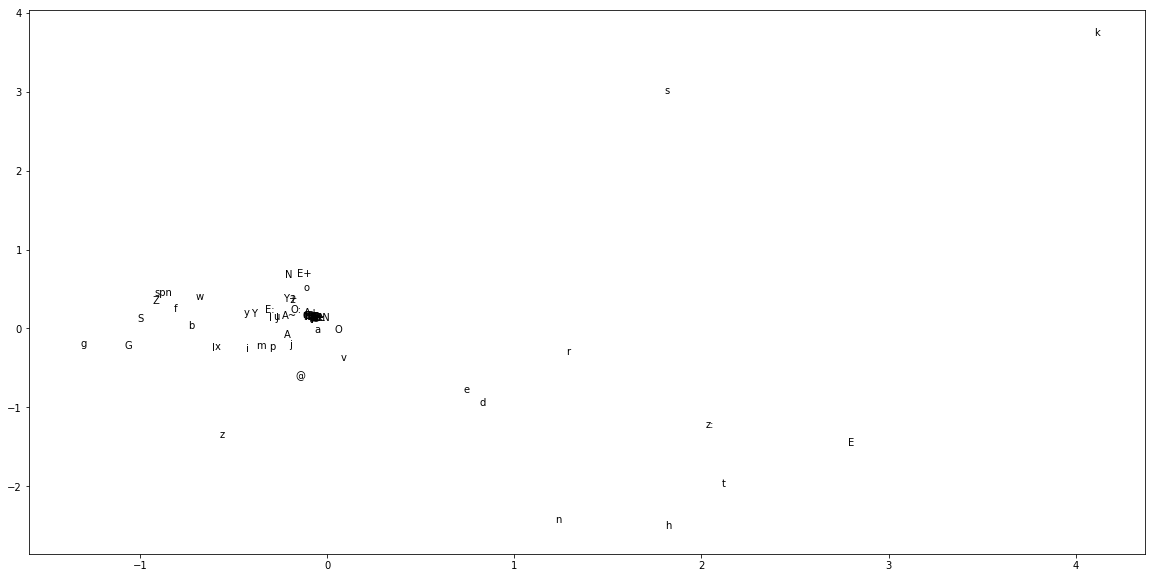

In [103]:
fig, cax = plt.subplots(figsize=(20, 10))
cax.scatter(Y[:,0],Y[:,1], alpha=0)
Y.shape
for i in range(len(phones)):
    cax.annotate(phones[i], (Y[i,0],Y[i,1]))

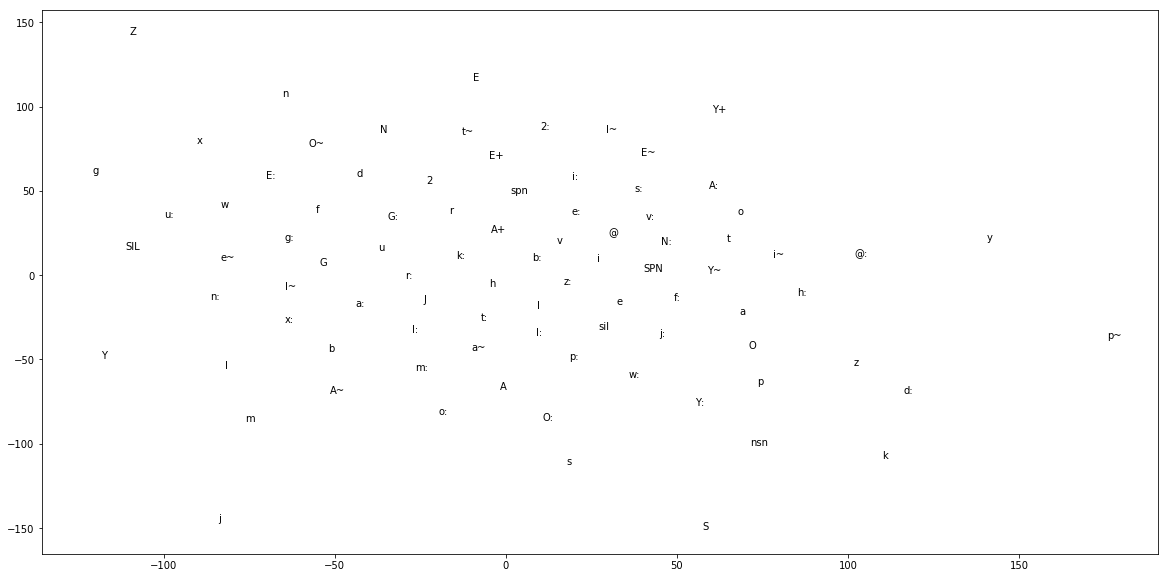

In [104]:
fig, cax = plt.subplots(figsize=(20, 10))
cax.scatter(YS[:,0],YS[:,1], alpha=0)
for i in range(len(phones)):
    cax.annotate(phones[i], (YS[i,0],YS[i,1]))

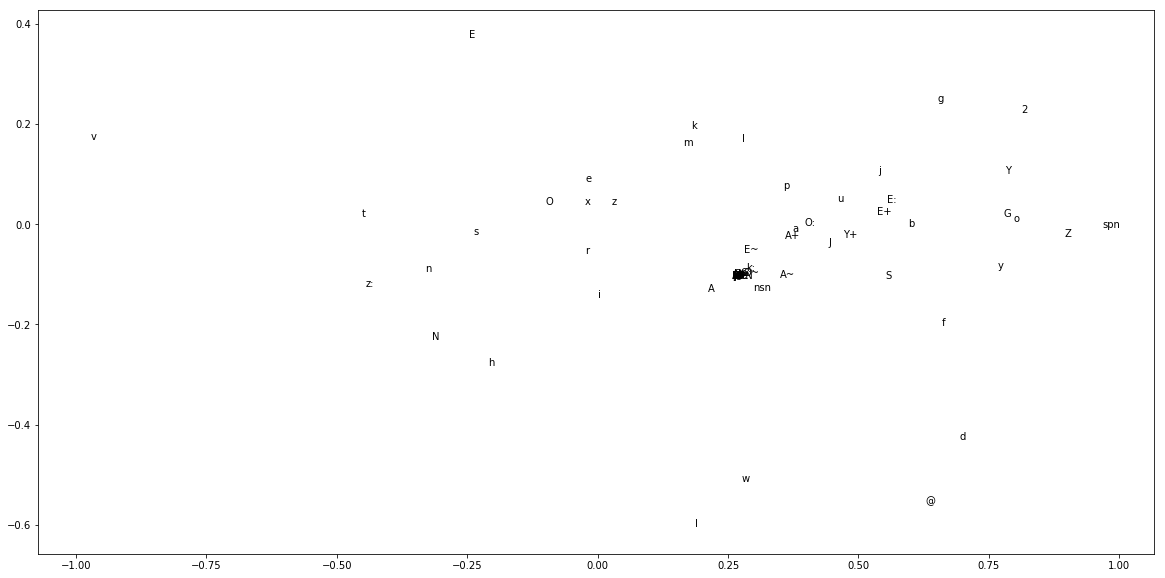

In [105]:
fig, cax = plt.subplots(figsize=(20, 10))
cax.scatter(fcT[:,0],fcT[:,1], alpha=0)
for i in range(len(phones)):
    cax.annotate(phones[i], (fcT[i,0],fcT[i,1]))

In [112]:
pairwise = 1-pairwise_distances(fcT, metric="cosine")
pairwise.shape

(87, 87)

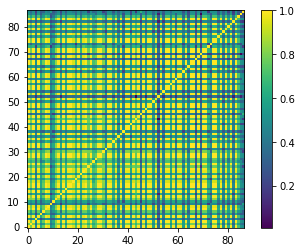

In [113]:
plt.imshow(pairwise.T, origin='lower', interpolation='nearest')
plt.colorbar()
plt.show()

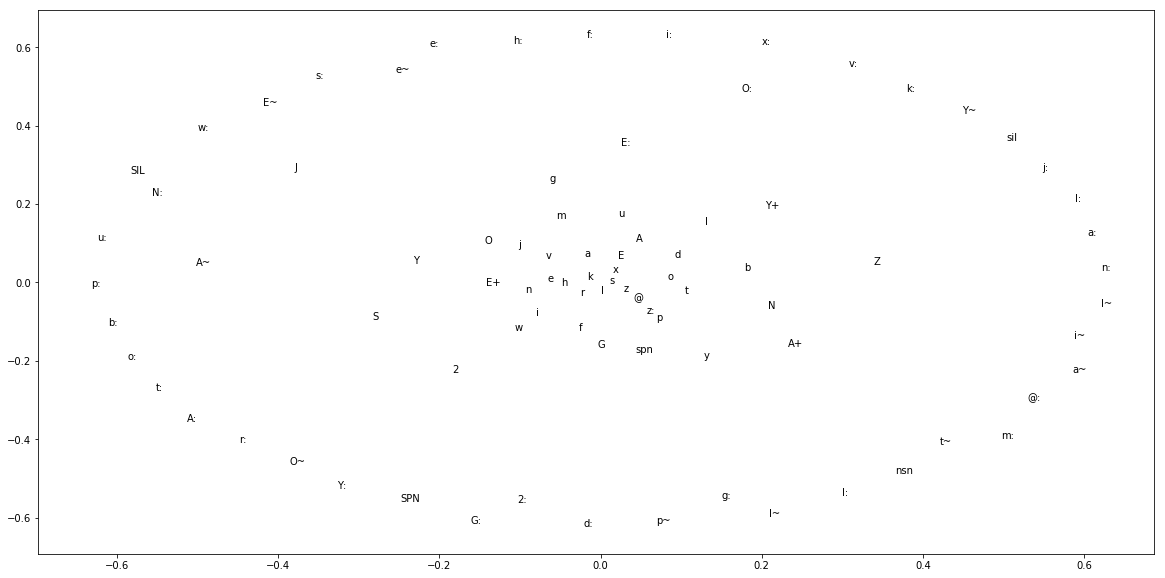

In [116]:
clf = MDS(n_components=2, n_init=4, max_iter=300, dissimilarity='precomputed')
YMDS = clf.fit_transform(pairwise)
fig, cax = plt.subplots(figsize=(20, 10))
cax.scatter(YMDS[:,0],YMDS[:,1], alpha=0)
for i in range(len(phones)):
    cax.annotate(phones[i], (YMDS[i,0],YMDS[i,1]))